In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv("train.csv")

# Separate features and labels in the training set
X_train = train_df.drop(columns=['label'])  # Assuming 'label' is the column name for digit labels
y_train = train_df['label']

# Plotting function
def plot_embedding(X_embedded, y, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y, palette='tab10', legend='full', s=15)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Digit')
    plt.show()

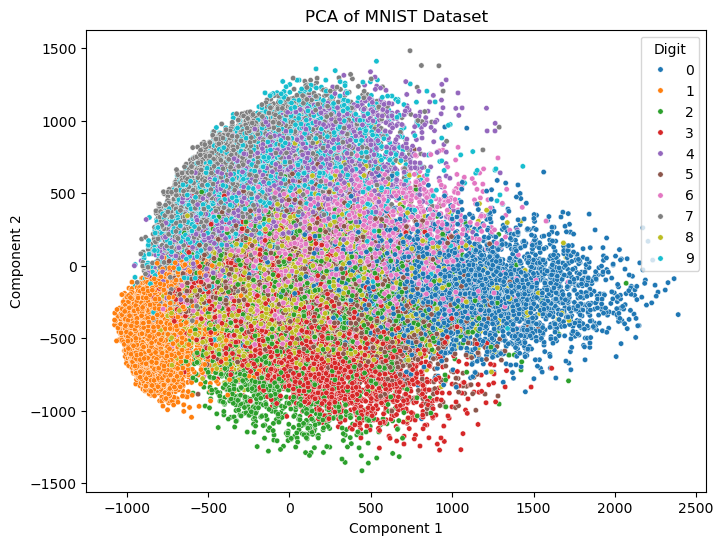

In [15]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plot_embedding(X_pca, y_train, "PCA of MNIST Dataset")

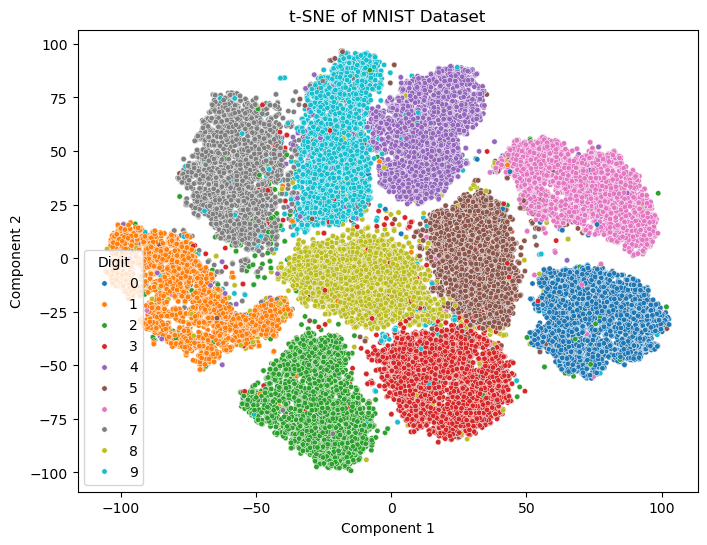

In [17]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)
plot_embedding(X_tsne, y_train, "t-SNE of MNIST Dataset")

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


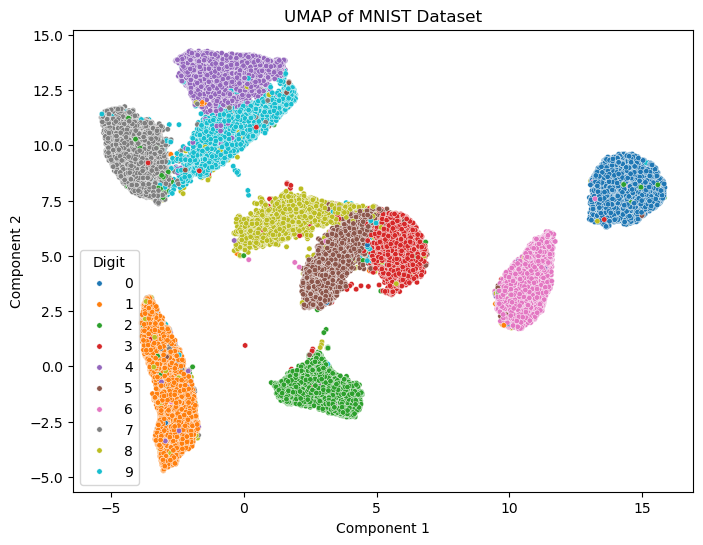

In [18]:
# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_train)
plot_embedding(X_umap, y_train, "UMAP of MNIST Dataset")

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


PCA Time: 0.61 seconds, Silhouette Score: 0.022
t-SNE Time: 113.69 seconds, Silhouette Score: 0.379
UMAP Time: 26.67 seconds, Silhouette Score: 0.493


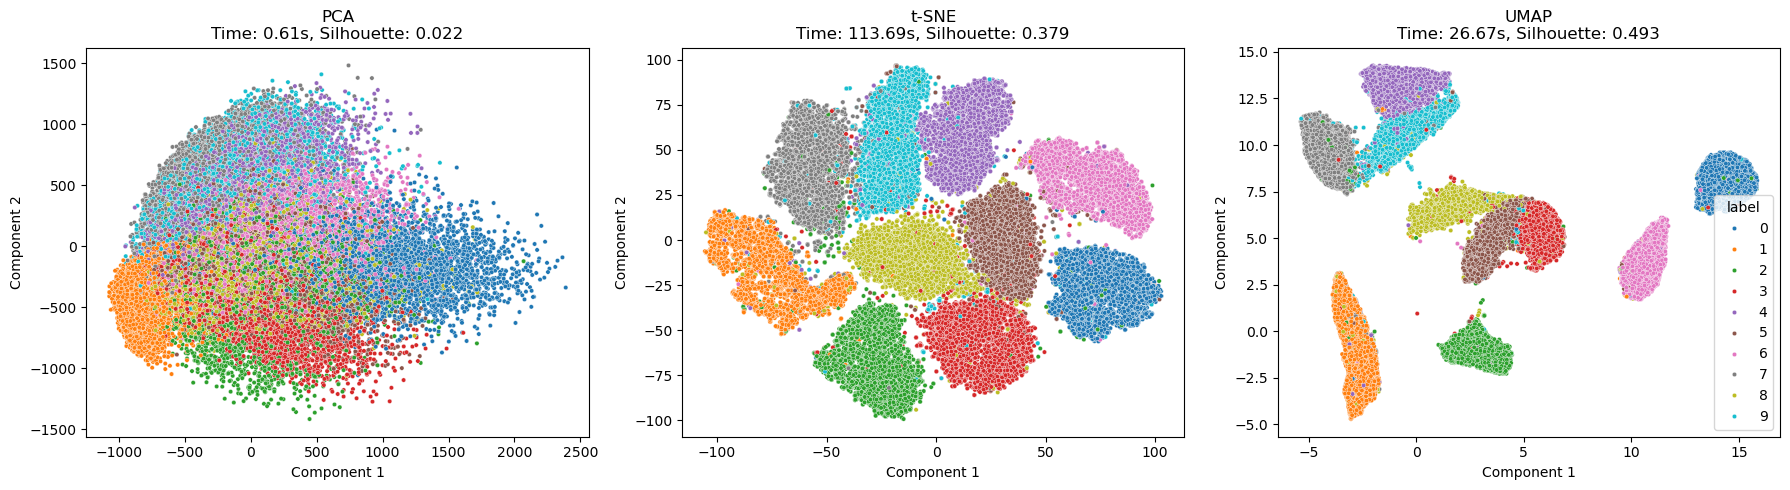

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import time

# Load the dataset
train_df = pd.read_csv("train.csv")  # Adjust the path if needed
X_train = train_df.drop(columns=['label'])  # Replace 'label' if your label column name is different
y_train = train_df['label']

# Helper function for measuring execution time and silhouette score
def reduce_and_measure(model, X, y):
    start_time = time.time()
    X_reduced = model.fit_transform(X)
    elapsed_time = time.time() - start_time
    silhouette = silhouette_score(X_reduced, y)
    return X_reduced, elapsed_time, silhouette

# Initialize models
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42)
umap_model = umap.UMAP(n_components=2, random_state=42)

# Apply PCA, t-SNE, and UMAP with measurements
X_pca, time_pca, silhouette_pca = reduce_and_measure(pca, X_train, y_train)
X_tsne, time_tsne, silhouette_tsne = reduce_and_measure(tsne, X_train, y_train)
X_umap, time_umap, silhouette_umap = reduce_and_measure(umap_model, X_train, y_train)

# Print Execution Time and Silhouette Scores
print(f"PCA Time: {time_pca:.2f} seconds, Silhouette Score: {silhouette_pca:.3f}")
print(f"t-SNE Time: {time_tsne:.2f} seconds, Silhouette Score: {silhouette_tsne:.3f}")
print(f"UMAP Time: {time_umap:.2f} seconds, Silhouette Score: {silhouette_umap:.3f}")

# Plotting function to show side-by-side comparisons
plt.figure(figsize=(18, 5))

# PCA Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='tab10', legend=None, s=10)
plt.title(f"PCA\nTime: {time_pca:.2f}s, Silhouette: {silhouette_pca:.3f}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# t-SNE Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette='tab10', legend=None, s=10)
plt.title(f"t-SNE\nTime: {time_tsne:.2f}s, Silhouette: {silhouette_tsne:.3f}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# UMAP Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_train, palette='tab10', legend='full', s=10)
plt.title(f"UMAP\nTime: {time_umap:.2f}s, Silhouette: {silhouette_umap:.3f}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()
